In [1]:
import numpy as np
import matplotlib.pyplot as plt
import asdf
from matplotlib import rc
from scipy.optimize import curve_fit
import symlib
import sys
sys.path.append('/sdf/home/j/jaymarie/software/gravitree/python')
import gravitree
from scipy.integrate import quad
import astropy.constants as cons
import astropy.units as u
from tqdm import tqdm
from glob import glob

from gala.potential import PlummerPotential

from gala.units import galactic

sim_dir = "/fs/ddn/sdf/group/kipac/g/cosmo/ki21/phil1/simulations/ZoomIns/SymphonyMilkyWay/Halo023"

from mwgcs import Simulation, GCSystem, MassProfile, NFW, Einasto, sampleDwarfGCMF
from scipy.integrate import solve_ivp

sim = Simulation(sim_dir)

Gravitree path added to sys.path.


In [25]:
# spline an orbit
from scipy.interpolate import UnivariateSpline

In [3]:
sh_id = 5
gcsys = GCSystem(sim, sh_id)

In [4]:
t, q = gcsys.getPositions(0)

100%|██████████| 91/91 [03:04<00:00,  2.02s/it]


In [10]:
t_full = np.linspace(0, np.max(t), 1000)

In [7]:
x, y, z = q

In [26]:
spl_x = UnivariateSpline(t, x, s=0)
spl_y = UnivariateSpline(t, y, s=0)
spl_z = UnivariateSpline(t, z, s=0)

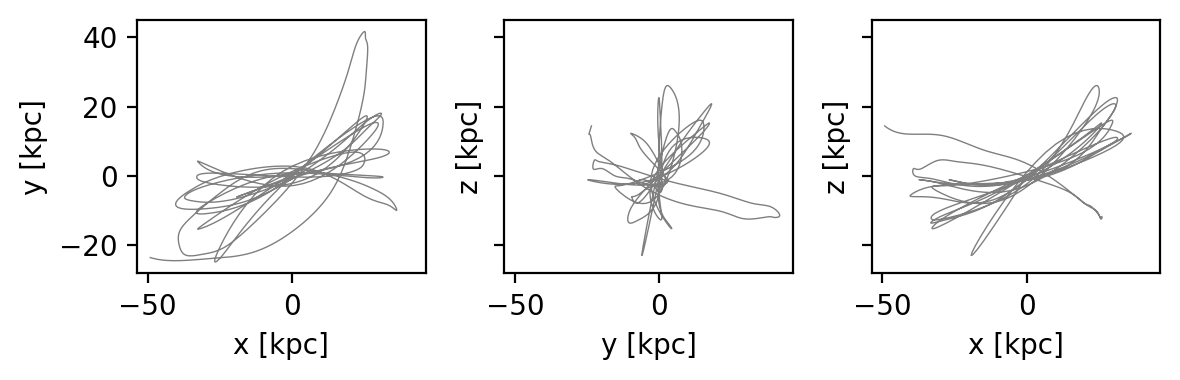

In [32]:
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(6,2), sharey=True, sharex=True)
xs, ys, zs = spl_x(t_full), spl_y(t_full), spl_z(t_full)
ax[0].plot(xs, ys, c='k', alpha=.5, lw=.5)
ax[1].plot(ys, zs, c='k', alpha=.5, lw=.5)
ax[2].plot(xs, zs, c='k', alpha=.5, lw=.5)

ax[0].set_xlabel('x [kpc]')
ax[1].set_xlabel('y [kpc]')
ax[2].set_xlabel('x [kpc]')

ax[0].set_ylabel('y [kpc]')
ax[1].set_ylabel('z [kpc]')
ax[2].set_ylabel('z [kpc]')

fig.tight_layout()
plt.show()

In [29]:
spl_vx = spl_x.derivative(n=1)
spl_vy = spl_y.derivative(n=1)
spl_vz = spl_z.derivative(n=1)

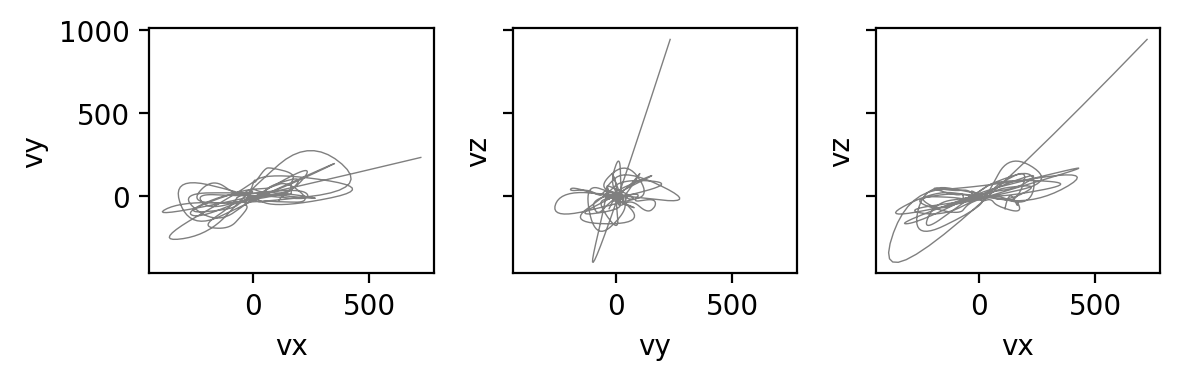

In [34]:
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(6,2), sharey=True, sharex=True)
xs, ys, zs = spl_vx(t_full), spl_vy(t_full), spl_vz(t_full)
ax[0].plot(xs, ys, c='k', alpha=.5, lw=.5)
ax[1].plot(ys, zs, c='k', alpha=.5, lw=.5)
ax[2].plot(xs, zs, c='k', alpha=.5, lw=.5)

ax[0].set_xlabel('vx')
ax[1].set_xlabel('vy')
ax[2].set_xlabel('vx')

ax[0].set_ylabel('vy')
ax[1].set_ylabel('vz')
ax[2].set_ylabel('vz')

fig.tight_layout()
plt.show()